In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session #  allows you to create classes in your code that can be mapped to specific tables in a given database. 
from sqlalchemy import create_engine, func

In [6]:
# Database Setup
    # use the create_engine() function to connect to our databaseuse the create_engine() function to connect to our database
engine = create_engine("sqlite:///hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
    #Automap Base creates a base class for an automap schema in SQLAlchemy
Base = automap_base() 
# reflect the tables
    #the prepare() function reflects the schema of our SQLite tables into our code and create mappings.
Base.prepare(engine, reflect=True) 

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [15]:
# Query data and precipitation columns
results = session.query(Measurement.date, Measurement.prcp).all()

In [16]:
# Print out results
    # Use a for loop to check if data ran
# for result in results: 
#     print(result)

# Exploratory Climate Analysis

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

#Starting from the last data point in the database. 
prev_year = dt.datetime(2017, 8, 23) #This code specifies the most recent date

# Calculate the date one year from the last date in data set.
    #add the dt.timedelta() function to the previous line of code. This function allows us to trace back a certain number of days.
prev_year = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

# Create a variable to store the results of the query
results = []

# Perform a query to retrieve the data and precipitation scores
    # session.query() function for this query will take two parameters. We will reference the Measurement table using Measurement.date and Measurement.prcp
    # use the filter() function to filter out the data we don't need.
    # add .all() to the end of our existing query, which extracts all of the results from our query and put them in a list. 
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipation']) 
df.sample(n=3) 

,date,precipation
684,2017-07-14,0.05
1259,2016-11-05,0.02
1062,2016-12-02,NaN


The first column is auto-generated and contains the row number. 

In [25]:
# Use the set_index() Function to set the index to the date column
    # Use the variable inplace to specify whether or not we want to create a new DataFrame
df.set_index(df["date"], inplace=True)
print(df)

                  date  precipation
date                               
2016-08-24  2016-08-24         0.08
2016-08-25  2016-08-25         0.08
2016-08-26  2016-08-26         0.00
2016-08-27  2016-08-27         0.00
2016-08-28  2016-08-28         0.01
...                ...          ...
2017-08-19  2017-08-19         0.09
2017-08-20  2017-08-20          NaN
2017-08-21  2017-08-21         0.56
2017-08-22  2017-08-22         0.50
2017-08-23  2017-08-23         0.45

[2223 rows x 2 columns]


Our DataFrame looks good. However, because we are using the date as the index, the DataFrame has two date columns, which is confusing. So we'll print the DataFrame without the index so we can see just the date and precipitation.

In [31]:
# Convert the DataFrame to strings, and then we'll set our index to "False." 
    #This will allow us to print the DataFrame without the index
# print(df.to_string(index=False))

In [34]:
# Sort the dataframe by date using the sort_index() function. 
    # Since we set our index to the date column previously, we can use our new index to sort our results
df = df.sort_index()
# print(df.to_string(index=False))

<AxesSubplot:xlabel='date'>

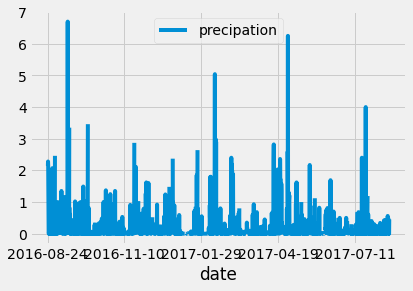

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

Along the x-axis are the dates from our dataset, and the y-axis is the total amount of precipitation for each day. While this data shows all of the station observations, we are interested in determining weather trends. One trend we can observe based on this plot is that some months have higher amounts of precipitation than others

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data using describe() function
df.describe()

,precipation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge